In [ ]:
from scraper.grid import get_city_grid
from data_manager import write, IS_STREET_INDEX, ALTITUDE_INDEX
import numpy as np

### Download mesh and get grid from OSM

#### Current version

Liczba ulic z szerokością: 1497
Liczba ulic bez szerokości: 3207
10322 11515
0.043224379916745916


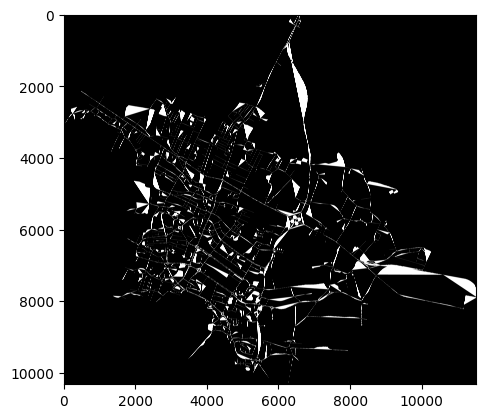

generating altitudes
concatenating
wymiary siatki punktów: (10322, 11515, 2)
punkt (100, 200): droga 0.0, wysokość: -10.0


In [2]:
cityname = "Tychy"

np_streets = get_city_grid(f"{cityname}, Poland")
print("generating altitudes")
np_altitudes = np.zeros(np_streets.shape, dtype=np.float64) - 10
print("concatenating")
grid = np.concat(
    [
        np_streets[:, :, np.newaxis],
        np_altitudes[:, :, np.newaxis]
    ],
    2
)
write(grid, cityname)
print(f"wymiary siatki punktów: {grid.shape}")
print(f"punkt (100, 200): droga {grid[100, 200, IS_STREET_INDEX]}, wysokość: {grid[100, 200, ALTITUDE_INDEX]}")

#### _Deprecated_

In [ ]:
from data_manager import Grid

cityname = "Limanowa"

np_streets = get_city_grid(f"{cityname}, Poland")
print("generating altitudes")
np_altitudes = np.zeros(np_streets.shape, dtype=np.float64) - 10
print("concatenating")
np_grid = np.concat(
    [
        np_streets[:, :, np.newaxis],
        np_altitudes[:, :, np.newaxis]
    ],
    2
)
del np_streets
del np_altitudes
print("instantiating Grid")
grid = Grid(np_grid)
write(grid, cityname)

Liczba ulic z szerokością: 757
Liczba ulic bez szerokości: 3880
33725 43776
0.036453417140268514


KeyboardInterrupt: 

### Data management

In [ ]:
from data_manager import GridManager
import numpy as np

filename = "test2.dat"

man = GridManager(filename, 2000, 2000, 3, 3)
man._read_metadata()

a = np.zeros((2000, 2000, 2), dtype=np.float64)
sub = a[:3,:3, :]
man.write_segment(a[:2,:3, :] + 1, 666, 0)
man.write_segment(a[:3,:2, :] + 2, 0, 666)
man.write_segment(a[:2,:2, :] + 3, 666, 666)
man.write_segment(a[:2,:3, :] + 4, 666, 1)
man.write_segment(a[:3,:2, :] + 5, 1, 666)
man.write_segment(sub + 6, 665, 665)
print(f"1: {man.read_segment(666, 0)}")
print(f"2: {man.read_segment(0, 666)}")
print(f"3: {man.read_segment(666, 666)}")
print(f"4: {man.read_segment(666, 1)}")
print(f"5: {man.read_segment(1, 666)}")
print(f"6: {man.read_segment(665, 665)}")
print(f"0: {man.read_segment(666, 665)}")
print(f"0: {man.read_segment(665, 666)}")


(segment_col, segment_row): (0, 666)
(cols_n, rows_n): (2000, 2000)
SEEKED_SEGMENT_SHAPE: (2, 3, 2)
1: [[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]
(segment_col, segment_row): (666, 0)
(cols_n, rows_n): (2000, 2000)
SEEKED_SEGMENT_SHAPE: (3, 2, 2)
2: [[[2. 2.]
  [2. 2.]]

 [[2. 2.]
  [2. 2.]]

 [[2. 2.]
  [2. 2.]]]
(segment_col, segment_row): (666, 666)
(cols_n, rows_n): (2000, 2000)
SEEKED_SEGMENT_SHAPE: (2, 2, 2)
3: [[[3. 3.]
  [3. 3.]]

 [[3. 3.]
  [3. 3.]]]
(segment_col, segment_row): (1, 666)
(cols_n, rows_n): (2000, 2000)
SEEKED_SEGMENT_SHAPE: (2, 3, 2)
4: [[[4. 4.]
  [4. 4.]
  [4. 4.]]

 [[4. 4.]
  [4. 4.]
  [4. 4.]]]
(segment_col, segment_row): (666, 1)
(cols_n, rows_n): (2000, 2000)
SEEKED_SEGMENT_SHAPE: (3, 2, 2)
5: [[[5. 5.]
  [5. 5.]]

 [[5. 5.]
  [5. 5.]]

 [[5. 5.]
  [5. 5.]]]
(segment_col, segment_row): (665, 665)
(cols_n, rows_n): (2000, 2000)
SEEKED_SEGMENT_SHAPE: (3, 3, 2)
6: [[[6. 6.]
  [6. 6.]
  [6. 6.]]

 [[6. 6.]
  [6. 6.]
  [6. 6.]]

 [[6. 6.]
